## Plot results per animal per bin

In [1]:
#Imports

# Plot best parameters for each animal
import json
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from preprocessing_utils_session_ines import get_animal_name, load_animal_list, load_animal_eid_dict, \
    get_all_unnormalized_data_this_session, create_train_test_sessions, bin_frac, prepro
sys.path.insert(0, '../fit_global_glmhmm/')
from glm_utils import load_animal_list
from post_processing_utils import load_data, load_glmhmm_data, load_cv_arr, \
    create_cv_frame_for_plotting, get_file_name_for_best_model_fold, \
    partition_data_by_session, create_violation_mask, get_marginal_posterior, load_glm_vectors



In [3]:
"""
Load trials data
"""
trials_dir = '/home/ines/repositories/representation_learning_variability/DATA/'
trials_dir = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/DATA/'

all_trials = pd.read_csv(trials_dir + "learning_private_one.csv")  
bin_num = 10
all_trials = bin_frac(all_trials, bin_num)

In [5]:
"""
Useful directories
"""
data_dir = '/home/ines/repositories/representation_learning_variability/DATA/GLMHMM/data_for_cluster/data_by_bin/'
overall_dir = '/home/ines/repositories/representation_learning_variability/Models/GLMHMM/results/ibl_individual_fit/'
figure_dir = '/home/ines/repositories/representation_learning_variability/Models/GLMHMM/figures/weights/'

data_dir = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/DATA/GLMHMM/'
processed_ibl_data_path = data_dir + "data_for_cluster/" + "data_by_bin" + str(bin_num) + "global_normalization/"
overall_dir = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Models/GLMHMM/results/ibl_individual_fit/'
figure_dir = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Models/GLMHMM/figures/weights/'
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)


In [6]:
prepro_trials = prepro(all_trials)

In [7]:
"""
Some parameters
"""
num_bins = 10

prior_sigma = 2
transition_alpha = 2
C = 2  # number of output classes
num_folds = 5  # number of folds
D = 1  # number of output dimensions
K_max = 5  # maximum number of latent states
num_models = K_max + 2  # model for each latent + 2 lapse models

K = 3
D, M, C = 1, 3, 2

No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.


CSH_ZAD_024
CSH_ZAD_023
CSH_ZAD_021


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using th

CSH_ZAD_019
CSH_ZAD_018
CSH_ZAD_017
CSH_ZAD_016
CSH_ZAD_015


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using th

NYU-21
CSH_ZAD_022
DY_015
DY_012
CSHL058


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using th

DY_014
DY_013
CSHL060
DY_009
DY_008


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using th

CSHL059
CSHL046
NYU-20
CSHL052
CSHL045


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using th

CSHL055
NYU-11
NYU-111
NYU-14
CSHL053
CSHL047
CSHL054


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using th

CSHL051
NYU-13
NYU-12
NYU-09
CSHL049


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using th

NYU-07
CSH_ZAD_009
CSHL_011
CSH_ZAD_006
CSH_ZAD_005


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using th

CSH_ZAD_001
CSH_ZAD_004
CSH_ZAD_003
CSH_ZAD_002
CSHL_014


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using th

CSHL_013
CSHL_012
SWC_001
CSHL_015
IBL_001


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using th

CSH_ZAD_024
CSH_ZAD_023
CSH_ZAD_021
CSH_ZAD_019
CSH_ZAD_018


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSH_ZAD_017
CSH_ZAD_016
CSH_ZAD_015
NYU-21
CSH_ZAD_022


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

DY_015
DY_012
CSHL058
DY_014
DY_013


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSHL060
DY_009
DY_008
DY_0086
CSHL059
CSHL046
NYU-20


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSHL052
CSHL045
CSHL055
NYU-11
NYU-14


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSHL053
CSHL047
CSHL054
CSHL051
NYU-13


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

NYU-12
NYU-09
CSHL049
NYU-07
CSH_ZAD_009


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSHL_011
CSH_ZAD_006
CSH_ZAD_005
CSH_ZAD_001
CSH_ZAD_004


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSH_ZAD_003
CSH_ZAD_002
CSHL_014
CSHL_013
CSHL_012


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

SWC_001
CSHL_015
IBL_001
CSH_ZAD_024
CSH_ZAD_023


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSH_ZAD_021
CSH_ZAD_019
CSH_ZAD_018
CSH_ZAD_017
CSH_ZAD_016


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSH_ZAD_015
NYU-21
CSH_ZAD_022
DY_015
DY_012


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSHL058
DY_014
DY_013
CSHL060
DY_009


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

DY_008
CSHL059
CSHL046
NYU-20
CSHL052


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSHL045
CSHL055
NYU-11
NYU-14
CSHL053


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSHL047
CSHL054
CSHL051
NYU-13
NYU-12


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

NYU-09
CSHL049
NYU-07
CSH_ZAD_009
CSHL_011


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSH_ZAD_006
CSH_ZAD_005
CSH_ZAD_001
CSH_ZAD_004
CSH_ZAD_003


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSH_ZAD_002
CSHL_014
CSHL_013
CSHL_012
SWC_001


/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:166: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

CSHL_015
IBL_001


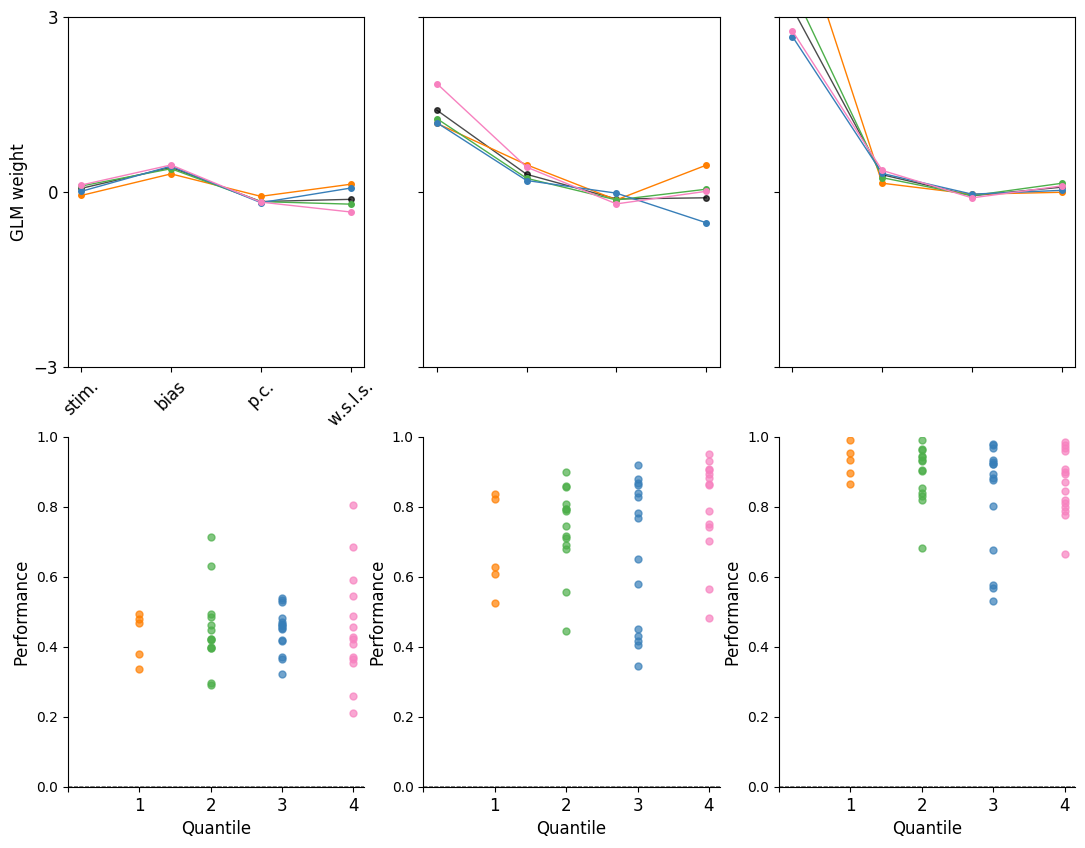

In [21]:
"""
Loop through bins and animals
"""

cols = [
    '#ff7f00', '#4daf4a', '#377eb8', '#f781bf', '#a65628', '#984ea3',
    '#999999', '#e41a1c', '#dede00', '#ff7f00'
]
quantile_colors = ['#ff7f00', '#4daf4a', '#377eb8', '#f781bf']

fig = plt.figure(figsize=(6.5 * 2, 10))
bins_interest = [0, 5, 9]
for b, bin in enumerate(bins_interest):

    labels_for_plot = ['stim', 'pc', 'wsls', 'bias']
    labels_for_quantiles = ['1', '2', '3', '4']

    animal_list = load_animal_list(processed_ibl_data_path + 'animal_list.npz')
    #plt.subplot(2, num_bins+1, b+1)
    animal_bin_weights = []
    q_1_weights = []
    q_2_weights = []
    q_3_weights = []
    q_4_weights = []

    for a, animal in enumerate(animal_list):
        print(animal)
        results_this_animal_dir = overall_dir + animal + '_' + str(bin+1)

        cv_file = results_this_animal_dir + "/cvbt_folds_model.npz"
        if os.path.exists(cv_file):
                
            cvbt_folds_model = load_cv_arr(cv_file)
            
            animal_bin_trials = prepro_trials.loc[(prepro_trials['subject_nickname']==animal) & (prepro_trials['bin_frac']==bin + 1.0)]
            animal_quantile = animal_bin_trials['quantile'].unique()[0]
            animal_bin_perf = np.nanmean(animal_bin_trials.correct_easy)
            
            # ==================== WEIGHTS =======================

            # TODO: need to think of how to select fold, for now average across folds?? - yes, seems it is what's done by Zoe
            
            # loop through folds to average results
            weight_vectors = []
            for fold in range(num_folds):
                
                this_fold_glm_vectors_file = results_this_animal_dir + '/GLM/fold_' + str(fold) + '/variables_of_interest_iter_0.npz'
                # Check if directory is empty
                dir = os.listdir(results_this_animal_dir + '/GLM/fold_' + str(fold) + '/')
                if len(dir) > 0:
                    this_fold_ll_train, this_fold_weight_vectors = load_glm_vectors(this_fold_glm_vectors_file)
                    if fold == 0:
                        weight_vectors = this_fold_weight_vectors
                    else:
                        weight_vectors = np.hstack((weight_vectors, this_fold_weight_vectors)) 
                        
            # Plot per animal on the corresponding bin column
            if len(weight_vectors) > 0: 
                avg_weight_vectors = np.mean(weight_vectors, axis=1)
                # Save results across animals
                if a == 0:
                    animal_bin_weights = avg_weight_vectors[0]
                else:
                    animal_bin_weights = np.vstack((animal_bin_weights, avg_weight_vectors))         

                # Save on corresponding quartile
                if animal_quantile == 1:
                    if len(q_1_weights) == 0:
                        q_1_weights = avg_weight_vectors[0]
                    else:
                        q_1_weights = np.vstack((q_1_weights, avg_weight_vectors))    
                elif animal_quantile == 2:
                    if len(q_2_weights) == 0:
                        q_2_weights = avg_weight_vectors[0]
                    else:
                        q_2_weights = np.vstack((q_2_weights, avg_weight_vectors))    
                elif animal_quantile == 3:
                    if len(q_3_weights) == 0:
                        q_3_weights = avg_weight_vectors[0]
                    else:
                        q_3_weights = np.vstack((q_3_weights, avg_weight_vectors))    
                elif animal_quantile == 4:
                    if len(q_4_weights) == 0:
                        q_4_weights = avg_weight_vectors[0]
                    else:
                        q_4_weights = np.vstack((q_4_weights, avg_weight_vectors))    
                
                # Plot per animal on the corresponding bin column
                plt.subplot(2, len(bins_interest), b+1)
                """
                plt.plot(range(M + 1),
                        -avg_weight_vectors[0],
                        '-o',
                        color=cols[int(animal_quantile)-1],
                        lw=1,
                        alpha=0.3,
                        markersize=3,
                        zorder=0)
                """
                # If last animal, draw the average across animals and across quartiles
                if a == len(animal_list)-1:
                    avg_animal_vectors = np.mean(animal_bin_weights, axis=0)
                    avg_q_1_vectors = np.mean(q_1_weights, axis=0)
                    avg_q_2_vectors = np.mean(q_2_weights, axis=0)
                    avg_q_3_vectors = np.mean(q_3_weights, axis=0)
                    avg_q_4_vectors = np.mean(q_4_weights, axis=0)

                    # Plot animal average
                    plt.plot(range(M + 1),
                            -avg_animal_vectors,
                            '-o',
                            color='black',
                            lw=1,
                            alpha=0.7,
                            markersize=4,
                            zorder=0)  
                    # Plot q_1 average
                    plt.plot(range(M + 1),
                            -avg_q_1_vectors,
                            '-o',
                            color=cols[0],
                            lw=1,
                            alpha=1,
                            markersize=4,
                            zorder=0)  
                    # Plot q_2 average
                    plt.plot(range(M + 1),
                            -avg_q_2_vectors,
                            '-o',
                            color=cols[1],
                            lw=1,
                            alpha=1,
                            markersize=4,
                            zorder=0)  
                    # Plot q_3 average
                    plt.plot(range(M + 1),
                            -avg_q_3_vectors,
                            '-o',
                            color=cols[2],
                            lw=1,
                            alpha=1,
                            markersize=4,
                            zorder=0)  
                    # Plot q_4 average
                    plt.plot(range(M + 1),
                            -avg_q_4_vectors,
                            '-o',
                            color=cols[3],
                            lw=1,
                            alpha=1,
                            markersize=4,
                            zorder=0)  

                if b == 0:
                    plt.yticks([-3, 0, 3, 6, 9, 12], fontsize=12)
                    plt.xticks([0, 1, 2, 3], ['stim.', 'bias', 'p.c.', 'w.s.l.s.'],
                            fontsize=12,
                            rotation=45)
                    plt.ylabel('GLM weight', fontsize=12)
                else:
                    plt.yticks([-3, 0, 3, 6, 9, 12], ['', '', '', '', '', ''])
                    plt.xticks([0, 1, 2, 3], ['', '', '', ''])
                plt.ylim([-3, 3])

                # Plot performance
                plt.subplot(2, len(bins_interest), b+1+3)
                plt.plot([int(animal_quantile)],
                        animal_bin_perf,
                        '-o',
                        color=cols[int(animal_quantile)-1],
                        alpha=0.7,
                        markersize=5,
                        zorder=0)    

                plt.xticks([0, 1, 2, 3, 4], ['', '1', '2', '3', '4'],
                        fontsize=12
                        )
                plt.ylabel('Performance', fontsize=12)
                plt.xlabel('Quantile', fontsize=12)
                plt.ylim([0, 1])

                plt.axhline(y=0, color="k", alpha=0.5, ls="--", linewidth=0.75)
                plt.gca().spines['right'].set_visible(False)
                plt.gca().spines['top'].set_visible(False)
                if b == 0:
                    plt.legend(fontsize=10,
                            labelspacing=0.2,
                            handlelength=1.4,
                            borderaxespad=0.2,
                            borderpad=0.2,
                            framealpha=0,
                            bbox_to_anchor=(0.2, 0.8))
        else:
            print(animal + str(bin+1))

In [29]:
weights_df = pd.DataFrame(columns=['bin', 'quantile', 'stim', 'pc', 'wsls', 'bias'], index = range(len((animal_list))))


In [34]:
bins_interest = [0, 5, 9]

animal_df = pd.DataFrame(columns=['animal', 'bin', 'quantile', 'stim', 'pc', 'wsls', 'bias'], index = range(len(bins_interest)))
animal_df

,animal,bin,quantile,stim,pc,wsls,bias
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
"""
Loop through bins and animals to save the coefficients
"""

bins_interest = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create a dataframe to populate
weights_df = pd.DataFrame(columns=['animal', 'bin', 'quantile', 'perf', 'stim', 'pc', 'wsls', 'bias'])

animal_list = load_animal_list(processed_ibl_data_path + 'animal_list.npz')
for a, animal in enumerate(animal_list):
    
    # Make some calculations
    animal_trials = prepro_trials.loc[prepro_trials['subject_nickname']==animal]
    animal_quantile = animal_trials['quantile'].unique()[0]

    # Save data per animal
    animal_df = pd.DataFrame(columns=['animal', 'bin', 'quantile', 'perf', 'stim', 'pc', 'wsls', 'bias'], index = range(len(bins_interest)))
    animal_df['animal'] = animal
    animal_df['quantile'] = animal_quantile

    for b, bin in enumerate(bins_interest):
        animal_bin_trials = prepro_trials.loc[(prepro_trials['subject_nickname']==animal) & (prepro_trials['bin_frac']==bin + 1.0)]
        animal_bin_perf = np.nanmean(animal_bin_trials.correct_easy)

        # Save data per bin
        animal_df['bin'][b] = bin+1
        animal_df['perf'][b] = animal_bin_perf
        # Get weights file
        results_this_animal_dir = overall_dir + animal + '_' + str(bin+1)
        cv_file = results_this_animal_dir + "/cvbt_folds_model.npz"
        if os.path.exists(cv_file):
            cvbt_folds_model = load_cv_arr(cv_file)
            # ==================== WEIGHTS =======================
            # loop through folds to average results
            weight_vectors = []
            for fold in range(num_folds):
                this_fold_glm_vectors_file = results_this_animal_dir + '/GLM/fold_' + str(fold) + '/variables_of_interest_iter_0.npz'
                # Check if directory is empty
                dir = os.listdir(results_this_animal_dir + '/GLM/fold_' + str(fold) + '/')
                if len(dir) > 0:
                    this_fold_ll_train, this_fold_weight_vectors = load_glm_vectors(this_fold_glm_vectors_file)
                    if fold == 0:
                        weight_vectors = this_fold_weight_vectors
                    else:
                        weight_vectors = np.hstack((weight_vectors, this_fold_weight_vectors)) 
            avg_weight_vectors = -np.mean(weight_vectors, axis=1)

            animal_df['stim'][b] = avg_weight_vectors[0][0]
            animal_df['pc'][b] = avg_weight_vectors[0][1]
            animal_df['wsls'][b] = avg_weight_vectors[0][2]
            animal_df['bias'][b] = avg_weight_vectors[0][3]
        
        else:
            print(animal + str(bin+1))
    
    if a == 0:
        weights_df = animal_df
    else:
        weights_df = weights_df.append(animal_df)

/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel

DY_0083
DY_0084
DY_0085
DY_0086
DY_0088
DY_0089
NYU-111
NYU-112


In [59]:
weights_df['quantile'] = weights_df['quantile'].astype(float)
weights_df['bin'] = weights_df['bin'].astype(float)
weights_df['perf'] = weights_df['perf'].astype(float)
weights_df['stim'] = weights_df['stim'].astype(float)
weights_df['pc'] = weights_df['pc'].astype(float)
weights_df['wsls'] = weights_df['wsls'].astype(float)
weights_df['bias'] = weights_df['bias'].astype(float)

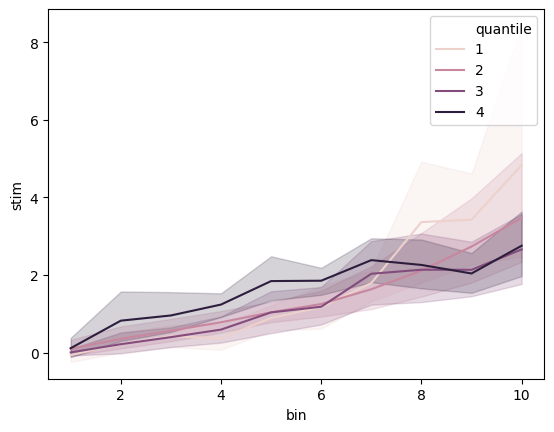

In [60]:
sns.lineplot(x='bin', y='stim', data=weights_df, hue='quantile')

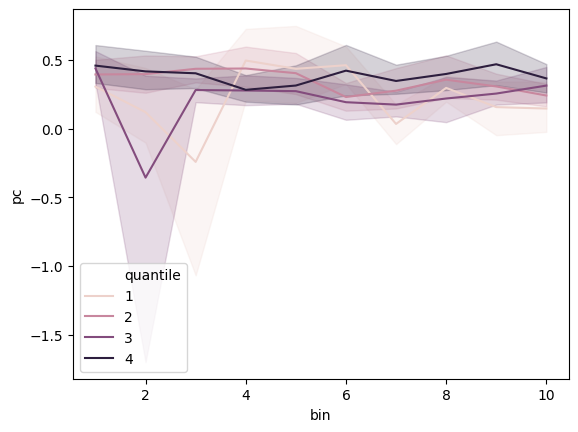

In [61]:
sns.lineplot(x='bin', y='pc', data=weights_df, hue='quantile')

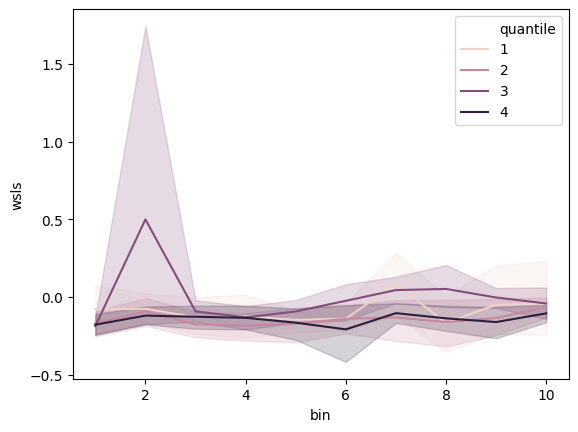

In [62]:
sns.lineplot(x='bin', y='wsls', data=weights_df, hue='quantile')

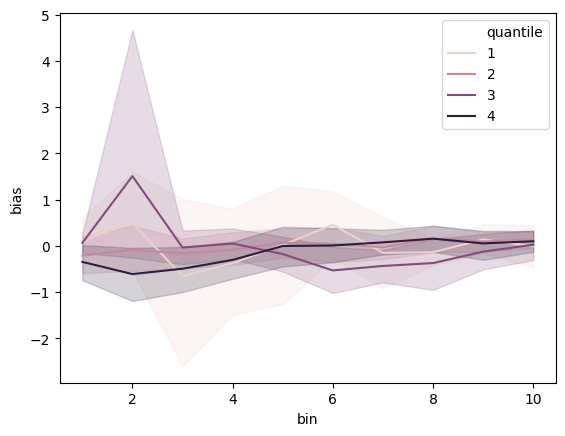

In [63]:
sns.lineplot(x='bin', y='bias', data=weights_df, hue='quantile')